# Training a Linear Regression Algorithm
***
This is an exercise in computing a linear regression with a single variable. <br>
I used the vectorized linear algebra functions from 'numpy' to optimize computations and the 'matplotlib' package for visual analysis.

In [1]:
# import required dependencies
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotData import *
from computeCost import *
from gradientDescent import *

Load the dataset from `ex1data1.txt` into the variables X and y.

In [2]:
# Load data from external file
data = np.loadtxt("ex1data1.txt", dtype=float, delimiter=',')
x = data[:,0, None]
y = data[:,1, None]
m = len(y)

It's a good idea to visualize the data before going any further. Then we can decide what analysis to perform. Since there are two quantitative variables, the data can be visualized using a scatterplot. <br>
Note: Most problems have more than two variables and cannot be vizualized with simple 2D plots.

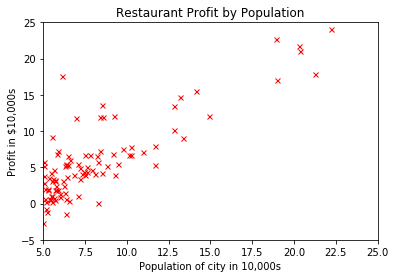

In [3]:
# Plot initial data
plotData(x, y)
plt.xlim(xmin=5, xmax=25)
plt.ylim(ymin=-5, ymax=25)
plt.title("Restaurant Profit by Population")
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

It looks like there is a linear relationship in the data so we want to find a linear model that fits the data. The general formula for a linear model is $$ f_{\theta}(x) = \theta_{0} + \theta_{1}x. $$ So we want the algorithm to find a function that fits this formula and describes the behavior of the data. <br>

Note: The parameter $\theta_{0}$ is often called the bias parameter in statistics.

The function described above can be vectorized by concatenating a column of ones onto x. Below I concatenate a bias vector of ones to the data and initialize the regression parameter vector $\theta$. <br>

In [4]:
# Prepare data for cost function
X = np.concatenate((np.ones((m, 1)), data[:,0, None]), axis=-1)
theta = np.zeros((2, 1))

These are the hyperparameters that determine how many iterations to train the algorithm and the learning rate of the training step. These will come up later.

In [5]:
# Calibrate gradient descent formula
iterations = 1500
alpha = 0.01

The goal now is to train the algorithm to find the parameters $\theta$ that minimize a cost function. The regression is trained with the mean squared error (MSE) function $$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\left(f(\theta)^{(i)} - y^{(i)}\right)^{2}. $$ We can see that as $\theta$ changes the cost goes up or down. We want the value of $\theta$ that makes $J$ as small as possible.

In [6]:
# Compute cost with theta = [0, 0]
J = computeCost(X, y, theta)
print("Cost computed for theta = [0 ; 0] is:")
print(J)

Cost computed for theta = [0 ; 0] is:
32.072733877455676


In [7]:
# Compute cost with theta = [-1, 2]
J = computeCost(X, y, np.matrix('-1 ; 2'))
print("Cost computed for theta = [-1 ; 2] is:")
print(J)

Cost computed for theta = [-1 ; 2] is:
54.24245508201238


So how do we get the algorithm to decide on which parameters to choose? We're going to use derivatives to calculate the gradient of the cost function in a process called gradient descent. In particular we want the derivative of $J$ with respect to $\theta$. So $$ \frac{\partial J}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}\left(f_{\theta}(\theta^{T}X) - y\right)^{2} $$ and $$ \frac{\partial J}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}\left(f_{\theta}(\theta^{T}X) - y\right)^{2}X_{i,2}. $$ This will produce a different $\theta$ that is theoretically closer to the optimized value that we want. Here we're going to use the hyperparameters from earlier. The number of iterations will determine how many times gradient descent is run and the parameter $\alpha$ will determine how large of a change each iteration has on $\theta$.

In [10]:
# Calculate theta with gradient descent formula
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Calculated theta from gradient descent:")
print(theta)

Calculated theta from gradient descent:
[[-3.87805118]
 [ 1.1912525 ]]


Now if we plot the 

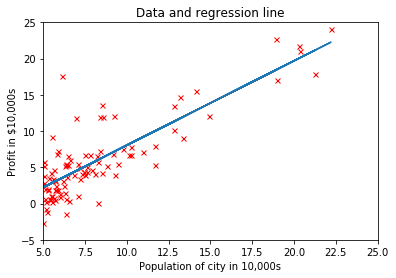

In [9]:
# Plot data with regression line
plotData(x, y)
plt.plot(x, np.dot(X, theta))
plt.xlim(xmin=5, xmax=25)
plt.ylim(ymin=-5, ymax=25)
plt.title("Data and regression line")
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()